In [165]:
from numpy import array, fromstring, asarray, shape, arange, append, polyfit, correlate
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# These are the stocks we are interested in examining for correlations with Trumps tweets

In [269]:
stocks=['JWN', 'UTX', 'RXN','LMT', 'F','GM','TM','AAPL','AMZN','M',
        'MSFT',
       'SNE',
       'COKE',
       'TSLA',
       'GEO','CX',
       'XOM','HCA',
       'IR',
       'NWSA','VMC',
       'WFC','GS',
       'GD', 'CIT',
       'SHLD','ETP',
       'SXL','MT',
       'XCO','SNBC',
       '^GSPC','^DJI',
       '^IXIC','SPY',
       'VIX','DIA',]

# First we load the historical data into a pandas dataframe up to today 

In [270]:
import pandas_datareader.data as web
import datetime    

start = datetime.datetime(2005,1,1)
end = datetime.datetime.now()   
df = web.DataReader(stocks, 'yahoo',start,end)


# We want to calculate the trailing returns for the stocks we examine 

In [5]:
def Trail_R(data,d):
    return [(data[i+d]-data[i])/data[i] for i in arange(len(data)-d)]

# On Feb-08-2017 Trump ranted about Nordstroms  dropping Ivanka's brand
## The first plot below is the adjusted close and the daily return for Nordstroms in 2017

## At first glance it appears that Trump's tweet caused the Nordstroms stock price to rise for several days. So lets examine the trend from previous years. 

In [131]:
t_chatter=[('2017-02-08',-1,stocks[0]),
('2016-11-30',1,stocks[1]),
('2016-12-02',-1,stocks[2]),
('2016-12-06',-1,stocks[3]),
('2016-12-22',-1,stocks[3]),
('2017-1-09',1,stocks[4]),
('2017-1-03',-1,stocks[5]),
('2017-1-05',-1,stocks[6]),
('2016-2-19',-1,stocks[7]),
('2015-12-07',-1,stocks[8]),
('2015-7-6',-1,stocks[9])]
t_chatter_d=[d for d,v,n in t_chatter]
t_chatter_v=[v for d,v,n in t_chatter]
t_chatter_n=[n for d,v,n in t_chatter]

In [149]:
trail=(where(df['Adj Close'][t_chatter_n[i]].index==t_chatter_d[i])[0]-1)[0]
trail

3024

In [242]:
df.keys()

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [254]:
t_chatter_c=zeros(11)
for i in arange(len(t_chatter_d)):
    t_chatter_c[i]=(df['Adj Close'][t_chatter_n[i]][t_chatter_d[i]]-df['Open'][t_chatter_n[i]][t_chatter_d[i]])/df['Open'][t_chatter_n[i]][t_chatter_d[i]]

In [255]:
ccov=cov(t_chatter_c,t_chatter_v)
ccov[0,1]/sqrt(ccov[0,0])/sqrt(ccov[1,1])

-0.20328973468212394

In [256]:
t_chatter_c=zeros(11)
for i in arange(len(t_chatter_d)):
    t_chatter_c[i]=(df['High'][t_chatter_n[i]][t_chatter_d[i]]-df['Low'][t_chatter_n[i]][t_chatter_d[i]])/df['Low'][t_chatter_n[i]][t_chatter_d[i]]

In [257]:
ccov=cov(t_chatter_c,t_chatter_v)
ccov[0,1]/sqrt(ccov[0,0])/sqrt(ccov[1,1])

-0.034532055484825332

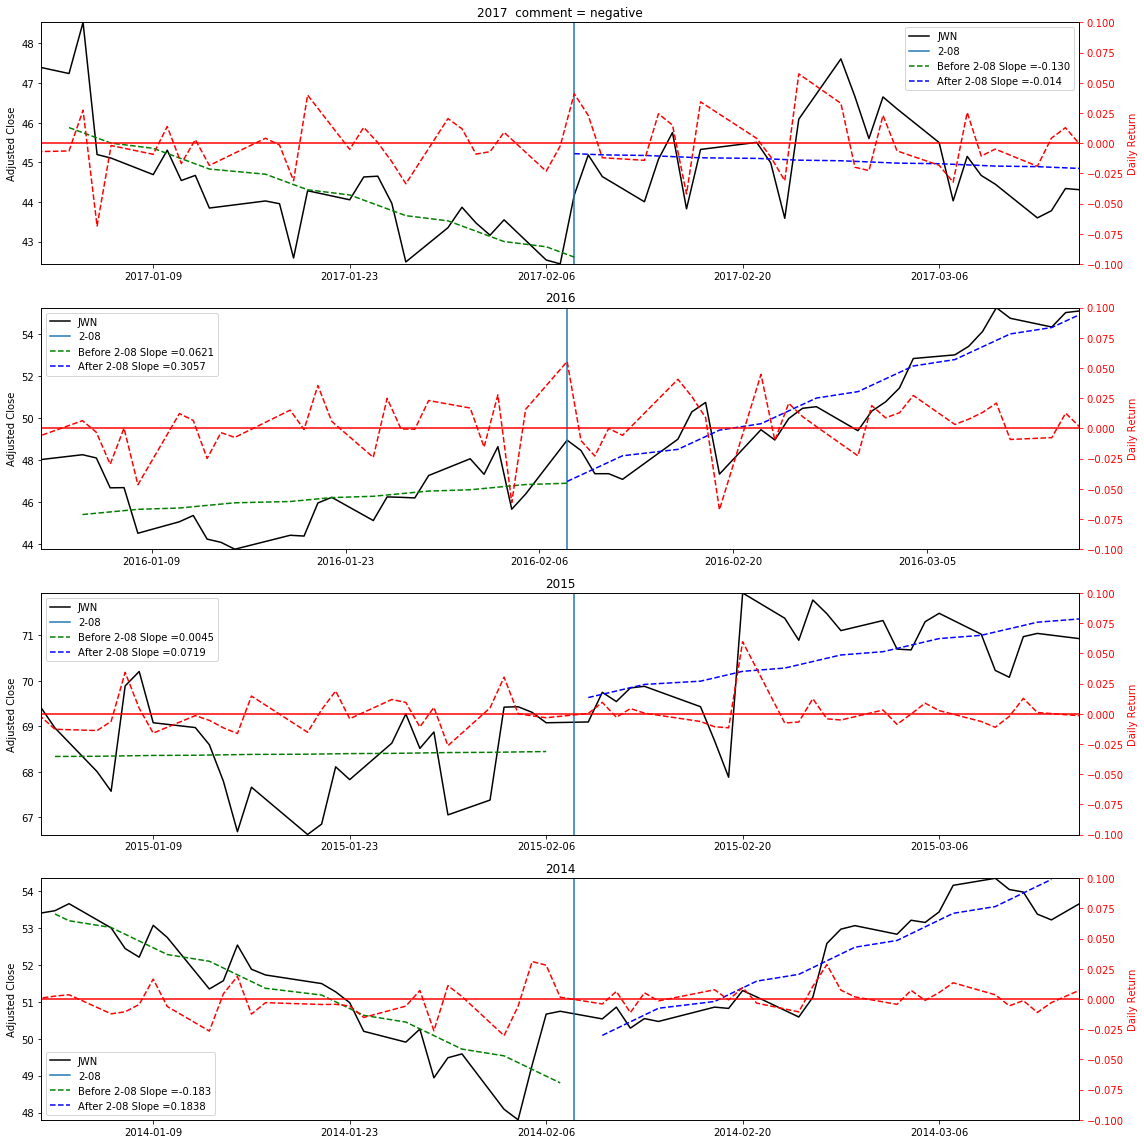

In [6]:
stock=stocks[0]
start_d,end_d,td=['2017-1-01','2017-3-16','2017-02-08']
fig, ax = plt.subplots(4,1,figsize=(16,16))

date=df['Adj Close'][stock].index.tolist()

ax[0].plot(date,df['Adj Close'][stock],'k')
ax[0].axvline(td,label=td[6:])
ax[0].set_xlim(start_d,end_d)
ax[0].set_ylabel('Adjusted Close', color='k')
ax[0].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[0].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[0].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


ax2=ax[0].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[0].set_title(start_d[:4]+ '  comment = negative')
ax[0].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[1].plot(date,df['Adj Close'][stock],'k')
ax[1].axvline(td,label=td[6:])
ax[1].set_xlim(start_d,end_d)
ax[1].set_ylabel('Adjusted Close', color='k')
ax[1].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[1].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[1].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[1].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[1].set_title(start_d[:4])
ax[1].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[2].plot(date,df['Adj Close'][stock],'k')
ax[2].axvline(td,label=td[6:])
ax[2].set_xlim(start_d,end_d)
ax[2].set_ylabel('Adjusted Close', color='k')
ax[2].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[2].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[2].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[2].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[2].set_title(start_d[:4])
ax[2].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[3].plot(date,df['Adj Close'][stock],'k')
ax[3].axvline(td,label=td[6:])
ax[3].set_xlim(start_d,end_d)
ax[3].set_ylabel('Adjusted Close', color='k')
ax[3].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[3].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[3].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[3].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[3].set_title(start_d[:4])
ax[3].legend()

tight_layout()
savefig('Nordstrom_returns.pdf')

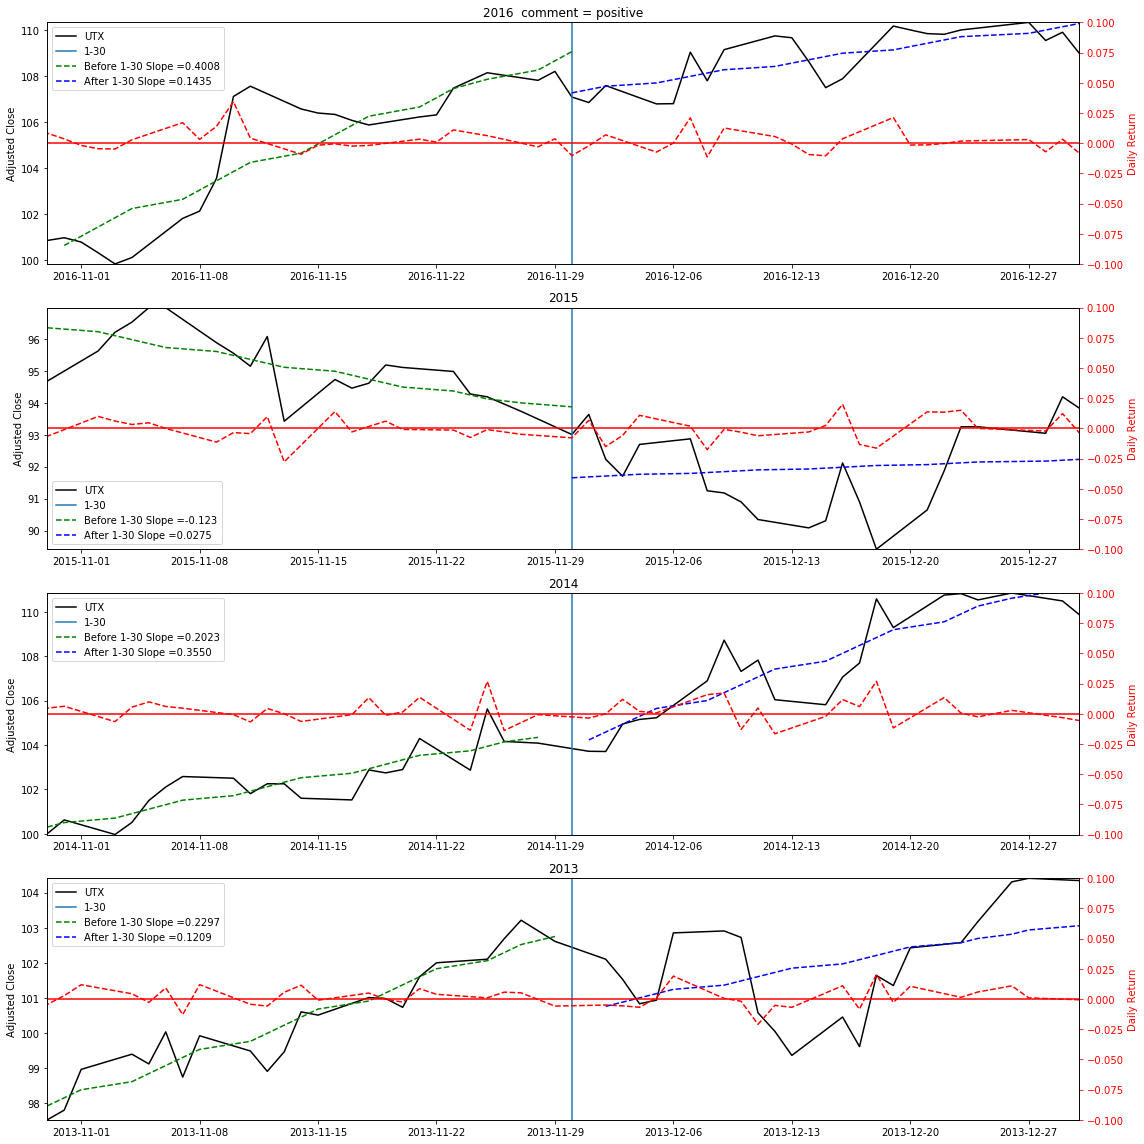

In [7]:
stock=stocks[1]
start_d,end_d,td=['2016-10-30','2016-12-30','2016-11-30']
fig, ax = plt.subplots(4,1,figsize=(16,16))

date=df['Adj Close'][stock].index.tolist()

ax[0].plot(date,df['Adj Close'][stock],'k')
ax[0].axvline(td,label=td[6:])
ax[0].set_xlim(start_d,end_d)
ax[0].set_ylabel('Adjusted Close', color='k')
ax[0].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[0].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[0].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


ax2=ax[0].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[0].set_title(start_d[:4]+ '  comment = positive')
ax[0].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[1].plot(date,df['Adj Close'][stock],'k')
ax[1].axvline(td,label=td[6:])
ax[1].set_xlim(start_d,end_d)
ax[1].set_ylabel('Adjusted Close', color='k')
ax[1].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[1].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[1].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[1].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[1].set_title(start_d[:4])
ax[1].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[2].plot(date,df['Adj Close'][stock],'k')
ax[2].axvline(td,label=td[6:])
ax[2].set_xlim(start_d,end_d)
ax[2].set_ylabel('Adjusted Close', color='k')
ax[2].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[2].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[2].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[2].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[2].set_title(start_d[:4])
ax[2].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[3].plot(date,df['Adj Close'][stock],'k')
ax[3].axvline(td,label=td[6:])
ax[3].set_xlim(start_d,end_d)
ax[3].set_ylabel('Adjusted Close', color='k')
ax[3].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[3].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[3].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[3].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[3].set_title(start_d[:4])
ax[3].legend()

tight_layout()
savefig('United_Technologies_returns.pdf')

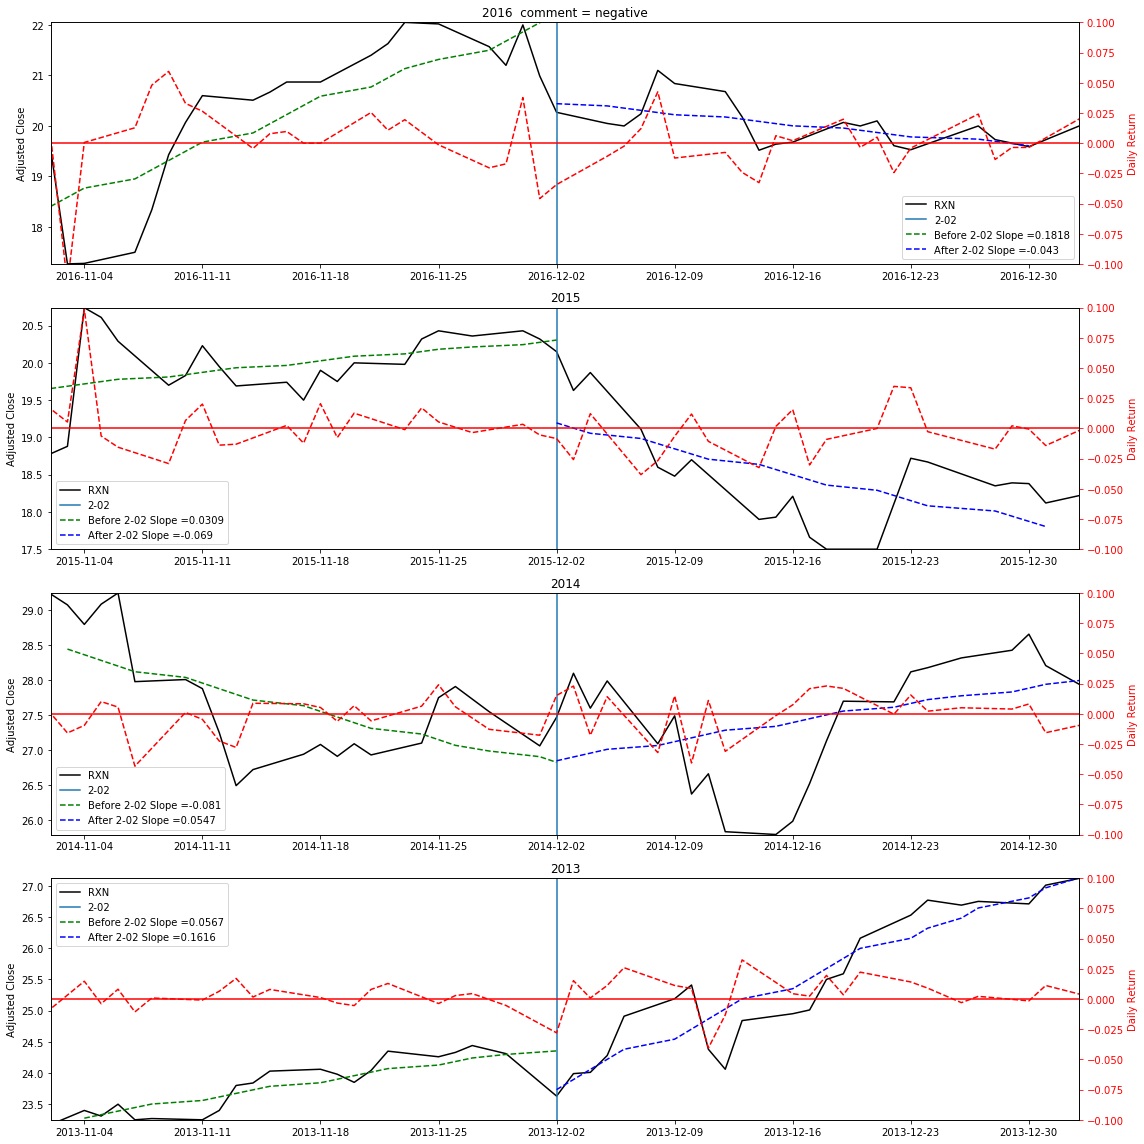

In [8]:
stock=stocks[2]
start_d,end_d,td=['2016-11-02','2017-1-02','2016-12-02']
fig, ax = plt.subplots(4,1,figsize=(16,16))

date=df['Adj Close'][stock].index.tolist()

ax[0].plot(date,df['Adj Close'][stock],'k')
ax[0].axvline(td,label=td[6:])
ax[0].set_xlim(start_d,end_d)
ax[0].set_ylabel('Adjusted Close', color='k')
ax[0].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[0].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[0].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


ax2=ax[0].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[0].set_title(start_d[:4]+ '  comment = negative')
ax[0].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[1].plot(date,df['Adj Close'][stock],'k')
ax[1].axvline(td,label=td[6:])
ax[1].set_xlim(start_d,end_d)
ax[1].set_ylabel('Adjusted Close', color='k')
ax[1].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[1].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[1].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[1].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[1].set_title(start_d[:4])
ax[1].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[2].plot(date,df['Adj Close'][stock],'k')
ax[2].axvline(td,label=td[6:])
ax[2].set_xlim(start_d,end_d)
ax[2].set_ylabel('Adjusted Close', color='k')
ax[2].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[2].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[2].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[2].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[2].set_title(start_d[:4])
ax[2].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[3].plot(date,df['Adj Close'][stock],'k')
ax[3].axvline(td,label=td[6:])
ax[3].set_xlim(start_d,end_d)
ax[3].set_ylabel('Adjusted Close', color='k')
ax[3].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[3].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[3].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[3].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[3].set_title(start_d[:4])
ax[3].legend()

tight_layout()
savefig('Rexnord_returns.pdf')

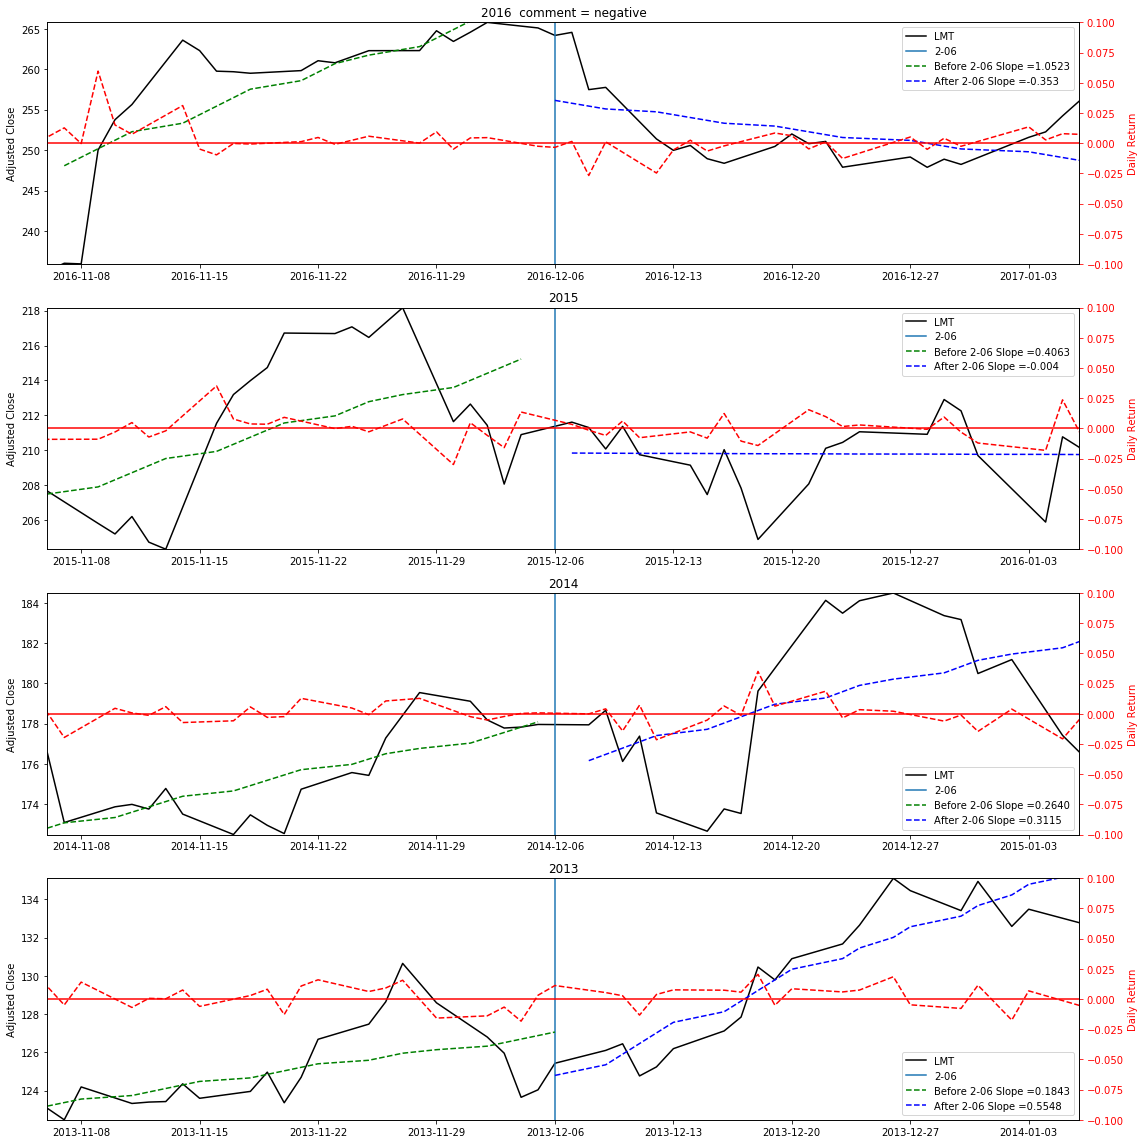

In [9]:
stock=stocks[3]
start_d,end_d,td=['2016-11-06','2017-01-06','2016-12-06']
fig, ax = plt.subplots(4,1,figsize=(16,16))

date=df['Adj Close'][stock].index.tolist()

ax[0].plot(date,df['Adj Close'][stock],'k')
ax[0].axvline(td,label=td[6:])
ax[0].set_xlim(start_d,end_d)
ax[0].set_ylabel('Adjusted Close', color='k')
ax[0].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[0].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[0].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


ax2=ax[0].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[0].set_title(start_d[:4]+ '  comment = negative')
ax[0].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[1].plot(date,df['Adj Close'][stock],'k')
ax[1].axvline(td,label=td[6:])
ax[1].set_xlim(start_d,end_d)
ax[1].set_ylabel('Adjusted Close', color='k')
ax[1].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[1].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[1].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[1].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[1].set_title(start_d[:4])
ax[1].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[2].plot(date,df['Adj Close'][stock],'k')
ax[2].axvline(td,label=td[6:])
ax[2].set_xlim(start_d,end_d)
ax[2].set_ylabel('Adjusted Close', color='k')
ax[2].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[2].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[2].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[2].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[2].set_title(start_d[:4])
ax[2].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[3].plot(date,df['Adj Close'][stock],'k')
ax[3].axvline(td,label=td[6:])
ax[3].set_xlim(start_d,end_d)
ax[3].set_ylabel('Adjusted Close', color='k')
ax[3].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[3].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[3].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[3].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[3].set_title(start_d[:4])
ax[3].legend()

tight_layout()
savefig('Lockhead_returns.pdf')

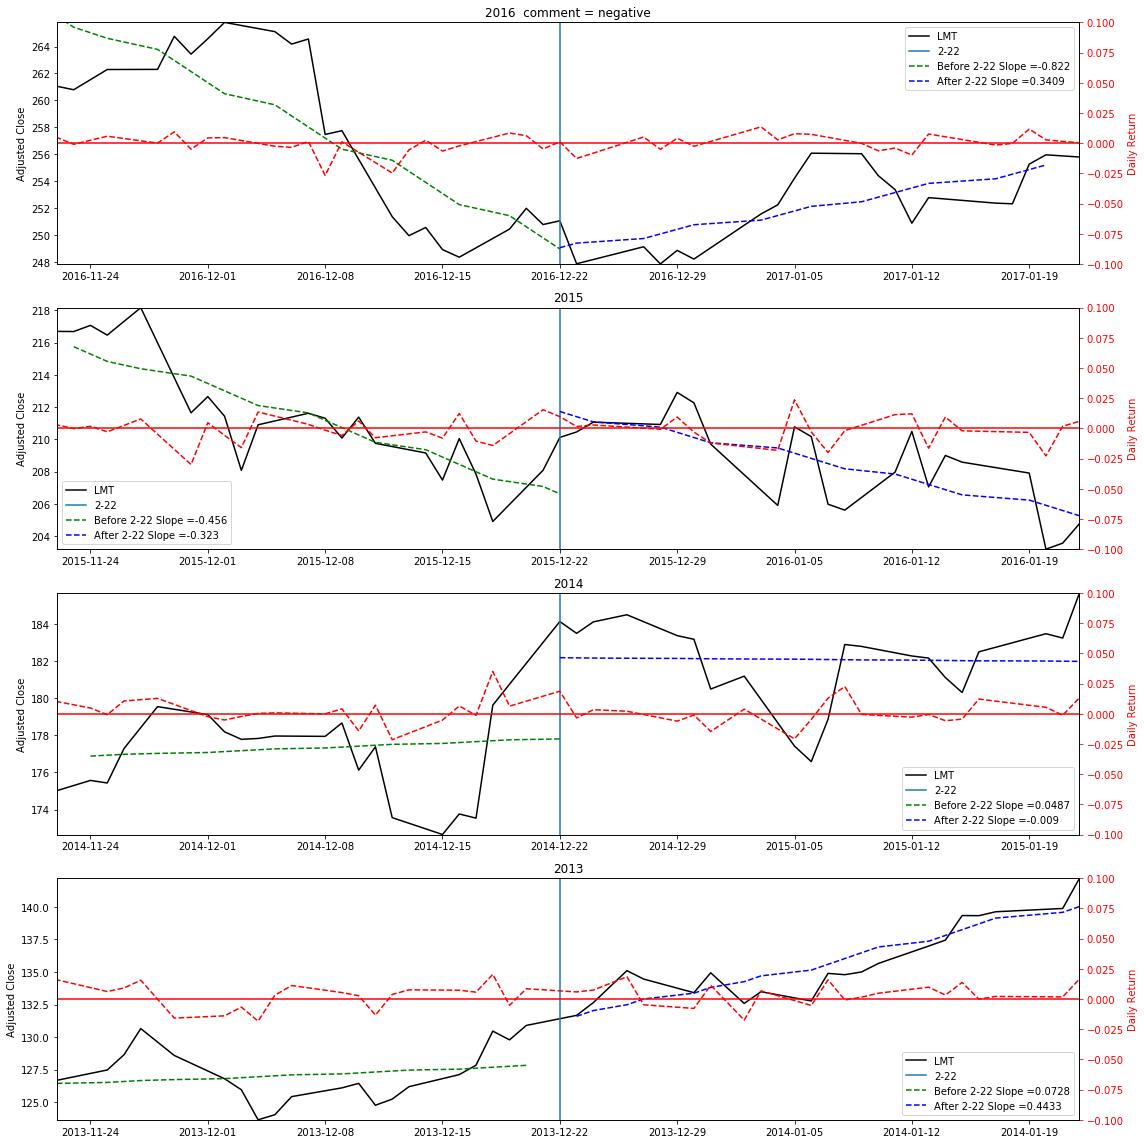

In [10]:
stock=stocks[3]
start_d,end_d,td=['2016-11-22','2017-01-22','2016-12-22']
fig, ax = plt.subplots(4,1,figsize=(16,16))

date=df['Adj Close'][stock].index.tolist()

ax[0].plot(date,df['Adj Close'][stock],'k')
ax[0].axvline(td,label=td[6:])
ax[0].set_xlim(start_d,end_d)
ax[0].set_ylabel('Adjusted Close', color='k')
ax[0].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[0].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[0].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


ax2=ax[0].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[0].set_title(start_d[:4]+ '  comment = negative')
ax[0].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[1].plot(date,df['Adj Close'][stock],'k')
ax[1].axvline(td,label=td[6:])
ax[1].set_xlim(start_d,end_d)
ax[1].set_ylabel('Adjusted Close', color='k')
ax[1].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[1].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[1].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[1].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[1].set_title(start_d[:4])
ax[1].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[2].plot(date,df['Adj Close'][stock],'k')
ax[2].axvline(td,label=td[6:])
ax[2].set_xlim(start_d,end_d)
ax[2].set_ylabel('Adjusted Close', color='k')
ax[2].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[2].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[2].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[2].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[2].set_title(start_d[:4])
ax[2].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[3].plot(date,df['Adj Close'][stock],'k')
ax[3].axvline(td,label=td[6:])
ax[3].set_xlim(start_d,end_d)
ax[3].set_ylabel('Adjusted Close', color='k')
ax[3].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[3].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[3].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[3].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[3].set_title(start_d[:4])
ax[3].legend()

tight_layout()
savefig('Lockhead_returns2.pdf')

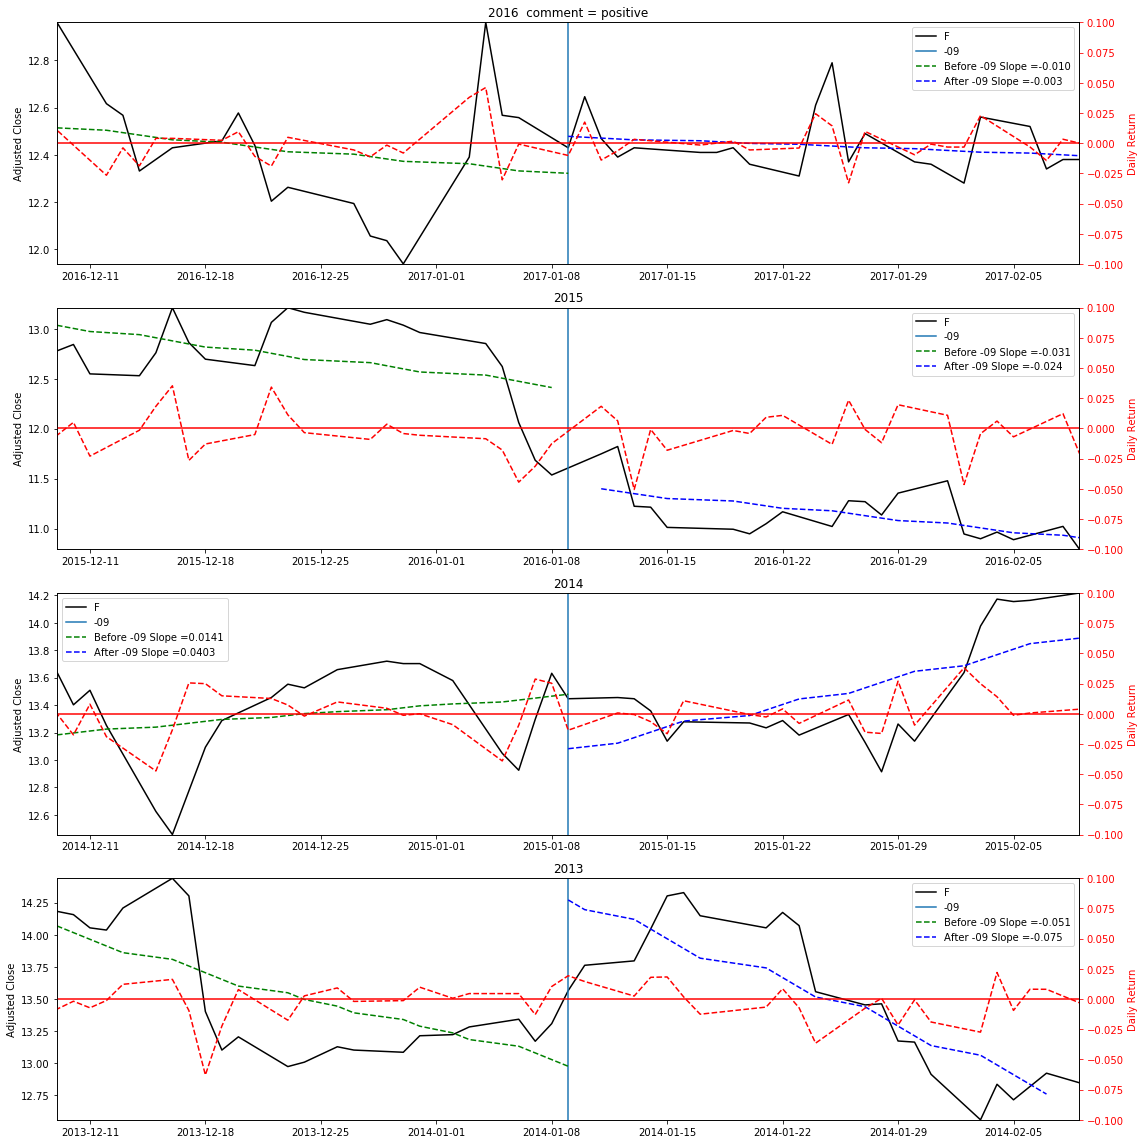

In [11]:
stock=stocks[4]
start_d,end_d,td=['2016-12-09','2017-02-09','2017-1-09']
fig, ax = plt.subplots(4,1,figsize=(16,16))

date=df['Adj Close'][stock].index.tolist()

ax[0].plot(date,df['Adj Close'][stock],'k')
ax[0].axvline(td,label=td[6:])
ax[0].set_xlim(start_d,end_d)
ax[0].set_ylabel('Adjusted Close', color='k')
ax[0].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[0].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[0].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


ax2=ax[0].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[0].set_title(start_d[:4]+ '  comment = positive')
ax[0].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[1].plot(date,df['Adj Close'][stock],'k')
ax[1].axvline(td,label=td[6:])
ax[1].set_xlim(start_d,end_d)
ax[1].set_ylabel('Adjusted Close', color='k')
ax[1].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[1].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[1].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[1].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[1].set_title(start_d[:4])
ax[1].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[2].plot(date,df['Adj Close'][stock],'k')
ax[2].axvline(td,label=td[6:])
ax[2].set_xlim(start_d,end_d)
ax[2].set_ylabel('Adjusted Close', color='k')
ax[2].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[2].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[2].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[2].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[2].set_title(start_d[:4])
ax[2].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[3].plot(date,df['Adj Close'][stock],'k')
ax[3].axvline(td,label=td[6:])
ax[3].set_xlim(start_d,end_d)
ax[3].set_ylabel('Adjusted Close', color='k')
ax[3].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[3].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[3].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[3].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[3].set_title(start_d[:4])
ax[3].legend()

tight_layout()
savefig('Ford_returns.pdf')

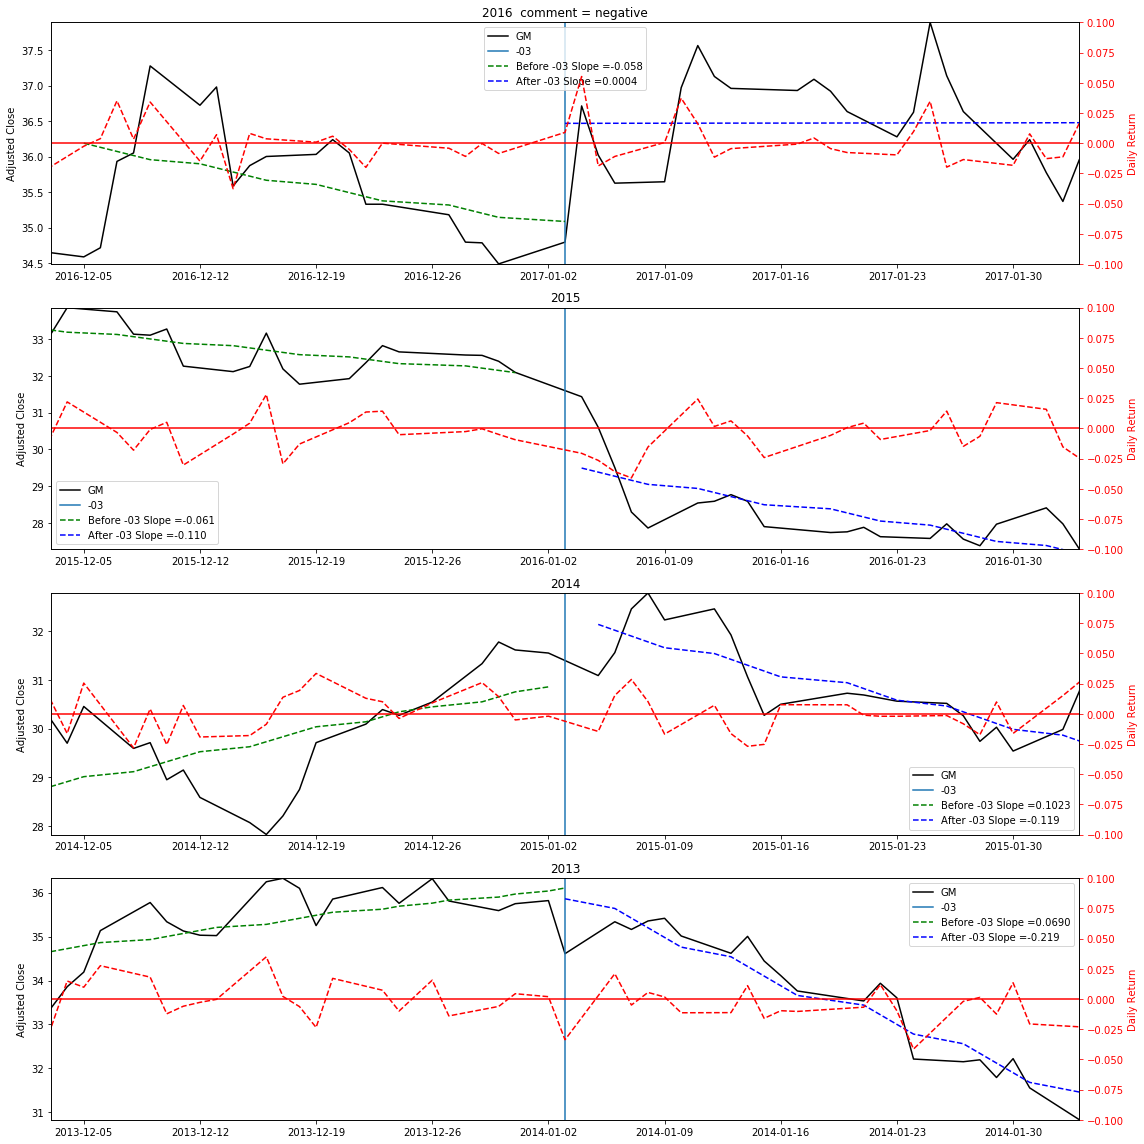

In [12]:
stock=stocks[5]
start_d,end_d,td=['2016-12-03','2017-02-03','2017-1-03']
fig, ax = plt.subplots(4,1,figsize=(16,16))

date=df['Adj Close'][stock].index.tolist()

ax[0].plot(date,df['Adj Close'][stock],'k')
ax[0].axvline(td,label=td[6:])
ax[0].set_xlim(start_d,end_d)
ax[0].set_ylabel('Adjusted Close', color='k')
ax[0].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[0].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[0].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


ax2=ax[0].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[0].set_title(start_d[:4]+ '  comment = negative')
ax[0].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[1].plot(date,df['Adj Close'][stock],'k')
ax[1].axvline(td,label=td[6:])
ax[1].set_xlim(start_d,end_d)
ax[1].set_ylabel('Adjusted Close', color='k')
ax[1].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[1].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[1].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[1].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[1].set_title(start_d[:4])
ax[1].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[2].plot(date,df['Adj Close'][stock],'k')
ax[2].axvline(td,label=td[6:])
ax[2].set_xlim(start_d,end_d)
ax[2].set_ylabel('Adjusted Close', color='k')
ax[2].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[2].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[2].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[2].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[2].set_title(start_d[:4])
ax[2].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[3].plot(date,df['Adj Close'][stock],'k')
ax[3].axvline(td,label=td[6:])
ax[3].set_xlim(start_d,end_d)
ax[3].set_ylabel('Adjusted Close', color='k')
ax[3].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[3].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[3].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[3].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[3].set_title(start_d[:4])
ax[3].legend()

tight_layout()
savefig('GM_returns.pdf')

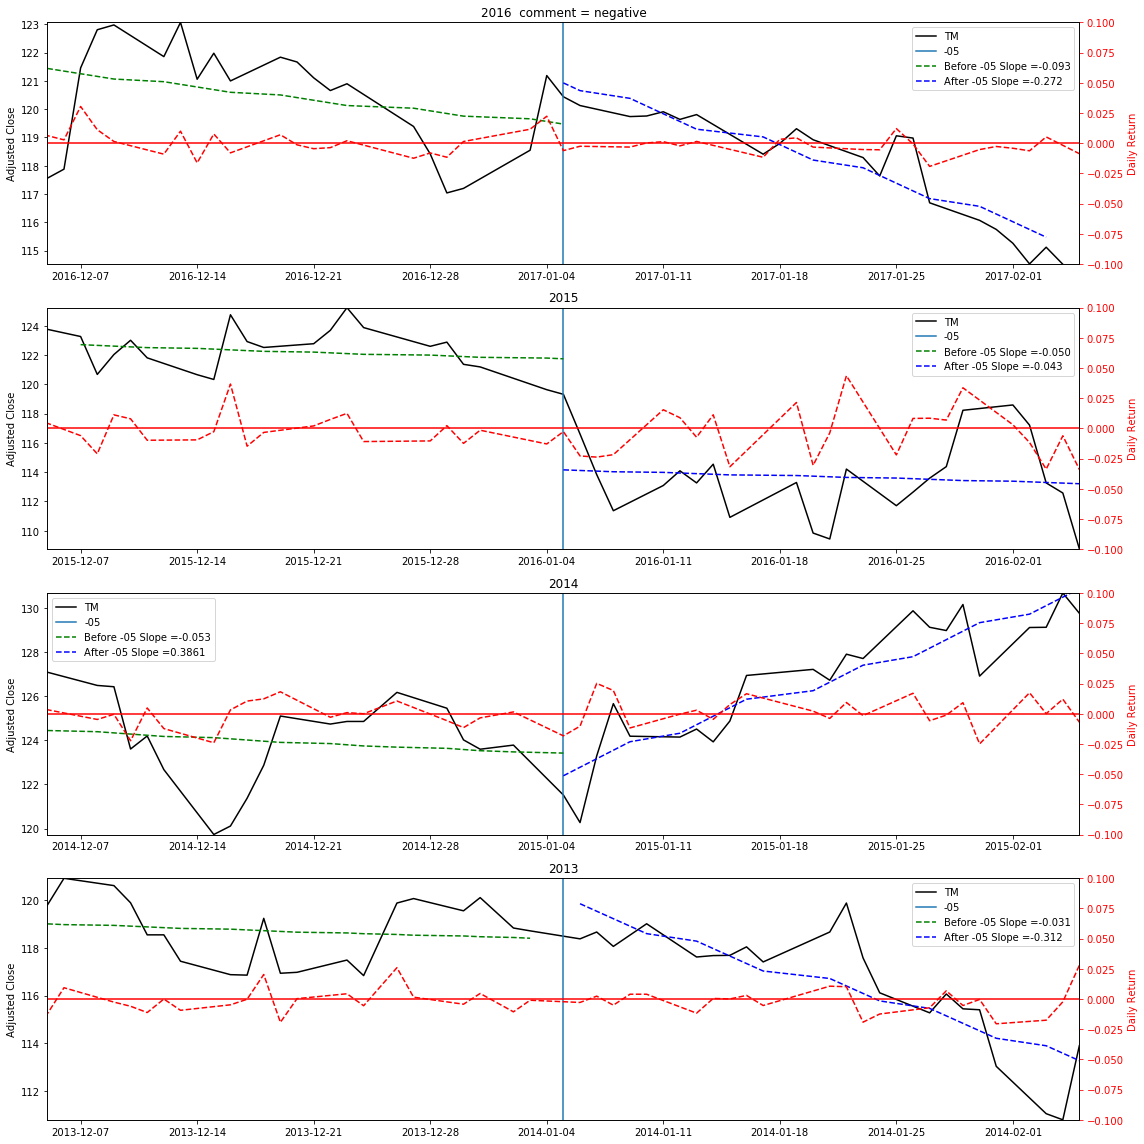

In [13]:
stock=stocks[6]
start_d,end_d,td=['2016-12-05','2017-02-05','2017-1-05']
fig, ax = plt.subplots(4,1,figsize=(16,16))

date=df['Adj Close'][stock].index.tolist()

ax[0].plot(date,df['Adj Close'][stock],'k')
ax[0].axvline(td,label=td[6:])
ax[0].set_xlim(start_d,end_d)
ax[0].set_ylabel('Adjusted Close', color='k')
ax[0].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[0].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[0].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


ax2=ax[0].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[0].set_title(start_d[:4]+ '  comment = negative')
ax[0].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[1].plot(date,df['Adj Close'][stock],'k')
ax[1].axvline(td,label=td[6:])
ax[1].set_xlim(start_d,end_d)
ax[1].set_ylabel('Adjusted Close', color='k')
ax[1].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[1].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[1].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[1].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[1].set_title(start_d[:4])
ax[1].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[2].plot(date,df['Adj Close'][stock],'k')
ax[2].axvline(td,label=td[6:])
ax[2].set_xlim(start_d,end_d)
ax[2].set_ylabel('Adjusted Close', color='k')
ax[2].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[2].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[2].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[2].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[2].set_title(start_d[:4])
ax[2].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[3].plot(date,df['Adj Close'][stock],'k')
ax[3].axvline(td,label=td[6:])
ax[3].set_xlim(start_d,end_d)
ax[3].set_ylabel('Adjusted Close', color='k')
ax[3].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[3].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[3].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[3].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[3].set_title(start_d[:4])
ax[3].legend()

tight_layout()
savefig('Toyota_returns.pdf')

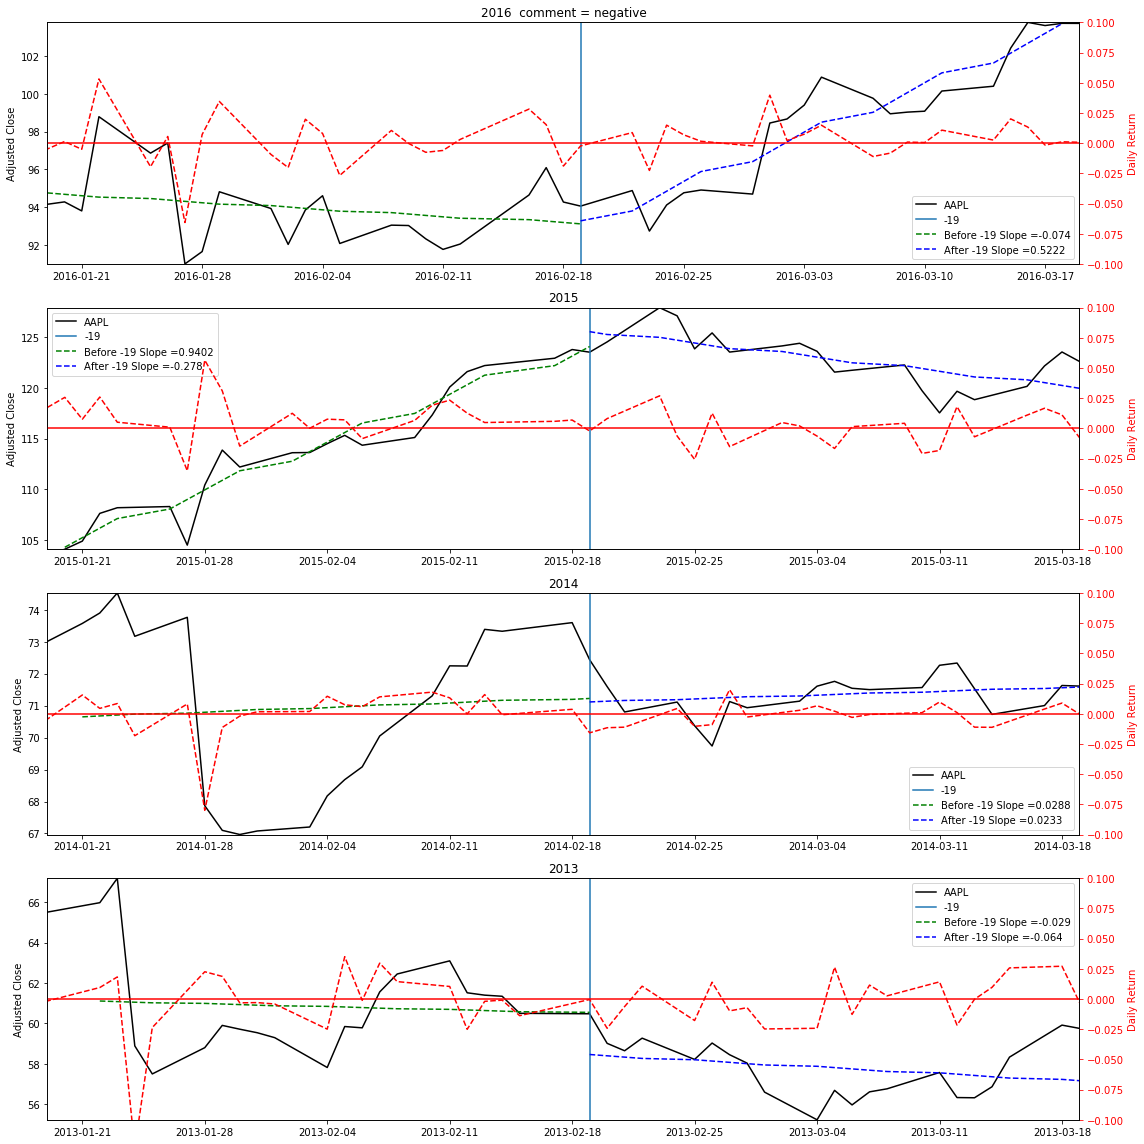

In [14]:
stock=stocks[7]
start_d,end_d,td=['2016-1-19','2016-03-19','2016-2-19']
fig, ax = plt.subplots(4,1,figsize=(16,16))

date=df['Adj Close'][stock].index.tolist()

ax[0].plot(date,df['Adj Close'][stock],'k')
ax[0].axvline(td,label=td[6:])
ax[0].set_xlim(start_d,end_d)
ax[0].set_ylabel('Adjusted Close', color='k')
ax[0].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[0].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[0].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


ax2=ax[0].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[0].set_title(start_d[:4]+ '  comment = negative')
ax[0].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[1].plot(date,df['Adj Close'][stock],'k')
ax[1].axvline(td,label=td[6:])
ax[1].set_xlim(start_d,end_d)
ax[1].set_ylabel('Adjusted Close', color='k')
ax[1].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[1].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[1].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[1].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[1].set_title(start_d[:4])
ax[1].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[2].plot(date,df['Adj Close'][stock],'k')
ax[2].axvline(td,label=td[6:])
ax[2].set_xlim(start_d,end_d)
ax[2].set_ylabel('Adjusted Close', color='k')
ax[2].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[2].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[2].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[2].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[2].set_title(start_d[:4])
ax[2].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[3].plot(date,df['Adj Close'][stock],'k')
ax[3].axvline(td,label=td[6:])
ax[3].set_xlim(start_d,end_d)
ax[3].set_ylabel('Adjusted Close', color='k')
ax[3].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[3].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[3].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[3].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[3].set_title(start_d[:4])
ax[3].legend()

tight_layout()
savefig('Apple_returns.pdf')

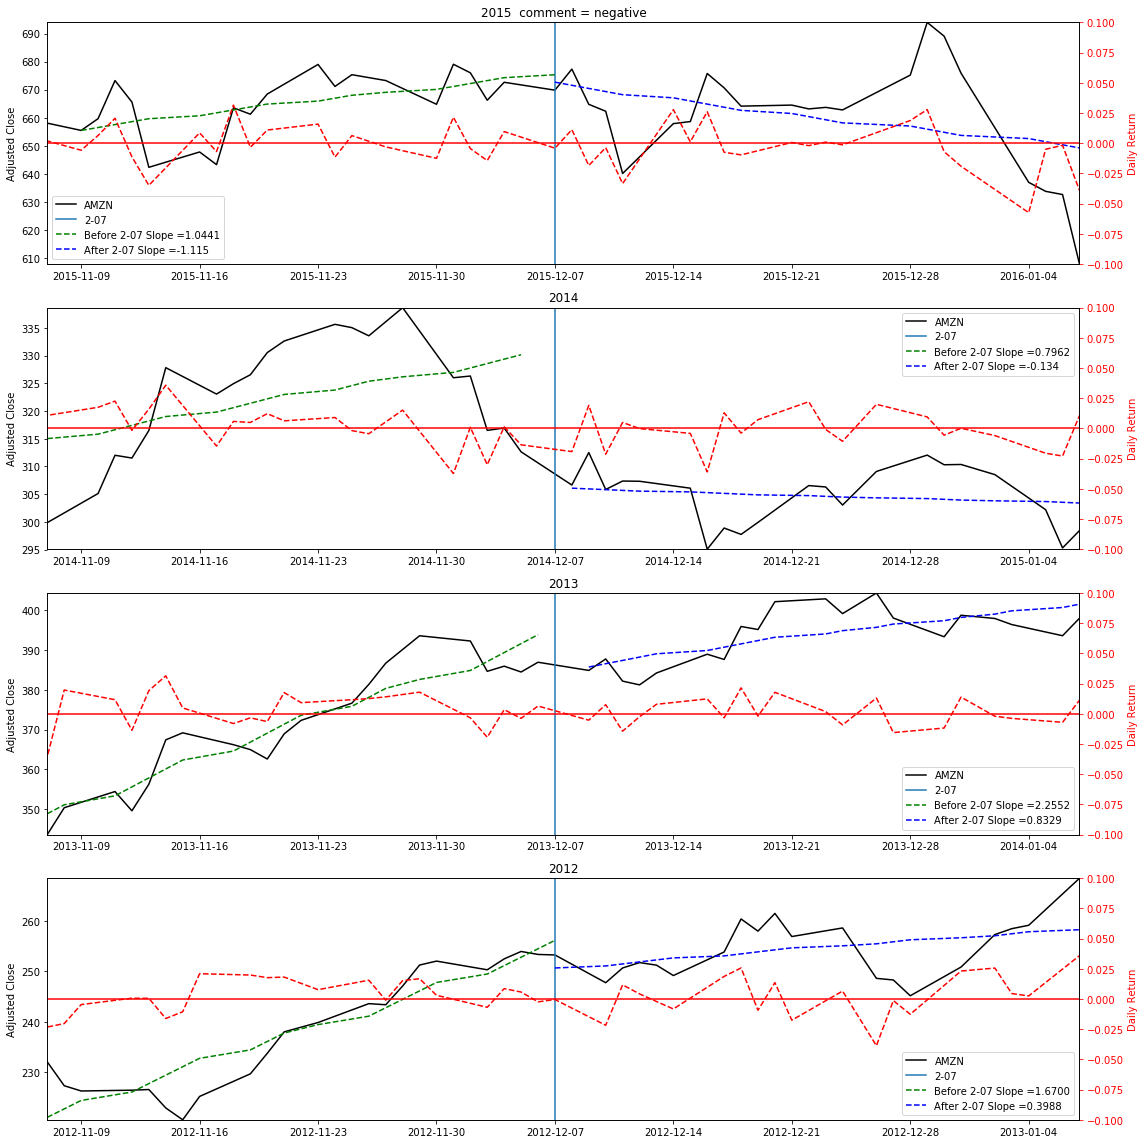

In [15]:
stock=stocks[8]
start_d,end_d,td=['2015-11-07','2016-01-07','2015-12-07']
fig, ax = plt.subplots(4,1,figsize=(16,16))

date=df['Adj Close'][stock].index.tolist()

ax[0].plot(date,df['Adj Close'][stock],'k')
ax[0].axvline(td,label=td[6:])
ax[0].set_xlim(start_d,end_d)
ax[0].set_ylabel('Adjusted Close', color='k')
ax[0].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[0].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[0].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


ax2=ax[0].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[0].set_title(start_d[:4]+ '  comment = negative')
ax[0].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[1].plot(date,df['Adj Close'][stock],'k')
ax[1].axvline(td,label=td[6:])
ax[1].set_xlim(start_d,end_d)
ax[1].set_ylabel('Adjusted Close', color='k')
ax[1].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[1].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[1].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[1].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[1].set_title(start_d[:4])
ax[1].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[2].plot(date,df['Adj Close'][stock],'k')
ax[2].axvline(td,label=td[6:])
ax[2].set_xlim(start_d,end_d)
ax[2].set_ylabel('Adjusted Close', color='k')
ax[2].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[2].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[2].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[2].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[2].set_title(start_d[:4])
ax[2].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[3].plot(date,df['Adj Close'][stock],'k')
ax[3].axvline(td,label=td[6:])
ax[3].set_xlim(start_d,end_d)
ax[3].set_ylabel('Adjusted Close', color='k')
ax[3].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[3].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[3].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[3].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[3].set_title(start_d[:4])
ax[3].legend()

tight_layout()
savefig('Amazon_returns.pdf')

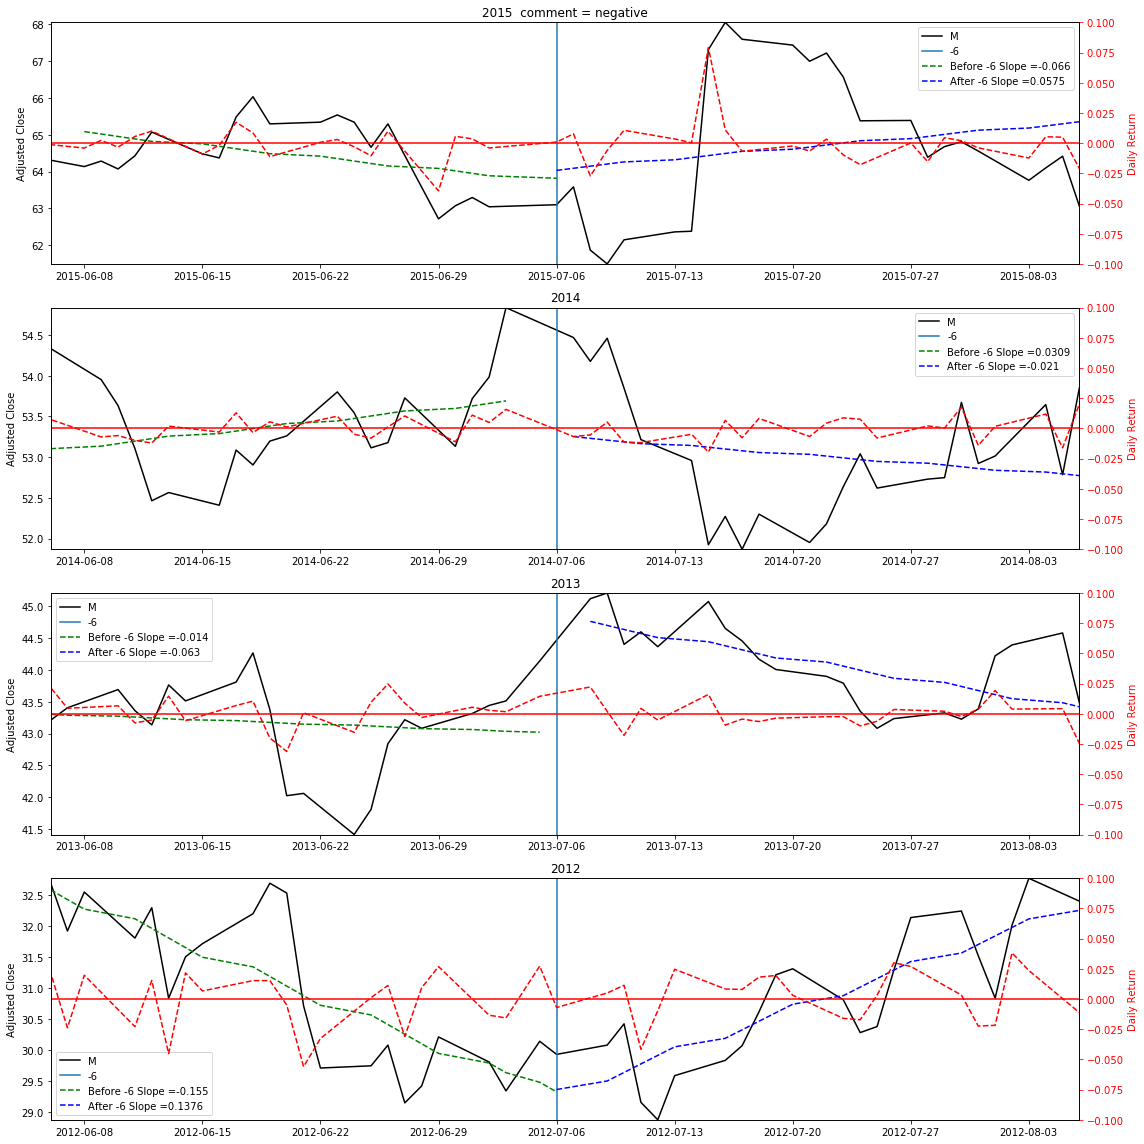

In [16]:
stock=stocks[9]
start_d,end_d,td=['2015-6-06','2015-08-06','2015-7-6']
fig, ax = plt.subplots(4,1,figsize=(16,16))

date=df['Adj Close'][stock].index.tolist()

ax[0].plot(date,df['Adj Close'][stock],'k')
ax[0].axvline(td,label=td[6:])
ax[0].set_xlim(start_d,end_d)
ax[0].set_ylabel('Adjusted Close', color='k')
ax[0].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[0].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[0].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


ax2=ax[0].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[0].set_title(start_d[:4]+ '  comment = negative')
ax[0].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[1].plot(date,df['Adj Close'][stock],'k')
ax[1].axvline(td,label=td[6:])
ax[1].set_xlim(start_d,end_d)
ax[1].set_ylabel('Adjusted Close', color='k')
ax[1].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[1].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[1].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[1].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[1].set_title(start_d[:4])
ax[1].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[2].plot(date,df['Adj Close'][stock],'k')
ax[2].axvline(td,label=td[6:])
ax[2].set_xlim(start_d,end_d)
ax[2].set_ylabel('Adjusted Close', color='k')
ax[2].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[2].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[2].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[2].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[2].set_title(start_d[:4])
ax[2].legend()


start_d,end_d,td=[str(int(start_d[:4])-1)+start_d[4:],str(int(end_d[:4])-1)+end_d[4:],str(int(td[:4])-1)+td[4:]]

ax[3].plot(date,df['Adj Close'][stock],'k')
ax[3].axvline(td,label=td[6:])
ax[3].set_xlim(start_d,end_d)
ax[3].set_ylabel('Adjusted Close', color='k')
ax[3].set_ylim(min(df['Adj Close'][stock][start_d:end_d]),max(df['Adj Close'][stock][start_d:end_d]))

date=df['Adj Close'][stock].index.tolist()
L=array(df['Adj Close'][stock].loc[start_d:td].tolist())
dl=array(df['Adj Close'][stock].loc[start_d:td].index.tolist())
xl=arange(len(dl))
ml,bl=polyfit(xl,L,1)
ax[3].plot(dl,ml*xl+bl,'--g',label='Before '+td[6:]+ ' Slope ='+str(ml)[:6])
R=array(df['Adj Close'][stock].loc[td:end_d].tolist())
dr=array(df['Adj Close'][stock].loc[td:end_d].index.tolist())
xr=arange(len(dr))
mr,br=polyfit(xr,R,1)
ax[3].plot(dr,mr*xr+br,'--b',label='After '+td[6:]+ ' Slope ='+str(mr)[:6])


date=df['Adj Close'][stock].index.tolist()
ax2=ax[3].twinx()
ax2.plot(date[1:],Trail_R(df['Adj Close'][stock],1),'--r')
ax2.axhline(0,color='r')
ax2.set_xlim(start_d,end_d)
ax2.set_ylim(-.1,.1)
ax2.set_ylabel('Daily Return', color='r')
ax2.tick_params('y', colors='r')
ax[3].set_title(start_d[:4])
ax[3].legend()

tight_layout()
savefig('Macys_returns.pdf')

## It seems Nordstrom's stock rises every year around the beginning of February and Trump's tweet did not have much if any impact over a several day period

# Twitter mining 

In [17]:
import tweepy
from tweepy import OAuthHandler
import json

In [2]:
consumer_key = 'fZE7TR8cFXIfCxxNYpfFdlSXH'
consumer_secret = 'ib9ijNNSWJREpoJjUVOkwmrMS3hD5WhC6QWtLdURsks0fVhel6'
access_token = '2878034917-DjdAJykeIF5trvGjQCloqR4rf8oOWuc81RkaQww'
access_secret = 'voNew2Fq47HXdrH0zGUK6UvuYL49xh2vs72GHeCRVtepG'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [88]:
def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            time.sleep(15 * 60)
            

In [109]:
count=1
hold=[]
with open('test.txt','w') as f:
    json.dump([], f)
for status in limit_handled(tweepy.Cursor(api.user_timeline,'realDonaldTrump').items(1000)):
    print(count)
    hold.append(status._json)
    if count%100==0:    
        with open('test.txt','r') as f:
            a=json.load(f)+hold
        with open('test.txt','w') as f:
            json.dump(a, f)
        hold=[]
    count+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


/home/kevin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: generator 'limit_handled' raised StopIteration


In [18]:
trump_tweets=json.load(open('test.txt','r'))

In [19]:
s=[pd.to_datetime(i['created_at']) for i in trump_tweets]
d={'date':s}
df=pd.DataFrame(d,s)
df.date=pd.to_datetime(df['date'])


In [20]:
hist=[]
tdates=[str(df['date'].tolist()[j])[:10] for j in arange(len(df['date'].tolist()))]
i=0
while i in arange(len(tdates)):
    count=1
    while tdates[i]==tdates[i+count]:
        count+=1
    hist.append((df['date'].tolist()[i],count))
    i+=count
    

IndexError: list index out of range

In [201]:
df['Adj Close']['tweet_count']=0

In [265]:
(df['Adj Close'][s].loc[date]-df['Adj Close'][s].loc[date])#/df['Adj Close'][s].loc[date]

0.0

In [266]:
hold={s:[] for s in stocks}
bins=[]
for k,v in tweet_hist:
        date='%s-%s-%s'%(k.year,k.month,k.day)
        try:
            for s in stocks:
                hold[s].append((df['Adj Close'][s].loc[date]-df['Open'][s].loc[date])/df['Open'][s].loc[date])
            bins.append(v)
        except KeyError:
           print(1)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [267]:
hold

{'AAPL': [-0.00021318220428383639,
  0.0075317622112685946,
  -0.0022253983727481136,
  0.002520640870551987,
  -0.00078995332136453224,
  -0.00043255007811193605,
  0.00035986326793518243,
  0.0033079678312665645,
  -0.00021524719147764671,
  0.0072056492809169136,
  -0.0074285214285712952,
  0.013779055869019135,
  -0.00065652902456195597,
  -0.0015313256637838595,
  0.0055183575743254333,
  -0.0061872613849446832,
  0.0049842998965778373,
  0.0034500551552537396,
  0.0045891559767953583,
  -0.0023586054744394185,
  -7.3856255199022903e-05,
  0.011613118965961526,
  0.0015779305443651393,
  -0.0025669030804145276,
  0.0058488722756797097,
  0.00091349824529111934,
  0.0032343191561226142,
  0.004627460519342496,
  0.0016583508948383096,
  -3.7904359167642373e-05,
  0.0091647957896938363,
  -0.0026731737074177585,
  0.0014465972049946241,
  -0.0058657606506120541,
  -0.0021072902458664135,
  0.00775502421117803,
  -0.00081887074482124057,
  -0.0036530583333333291,
  -0.008036704226733

In [241]:
cov(hold[stocks[i]][:60][::-1],bins[:60][::-1])

array([[  1.50846992e-05,  -1.21773641e-03],
       [ -1.21773641e-03,   1.00889831e+01]])

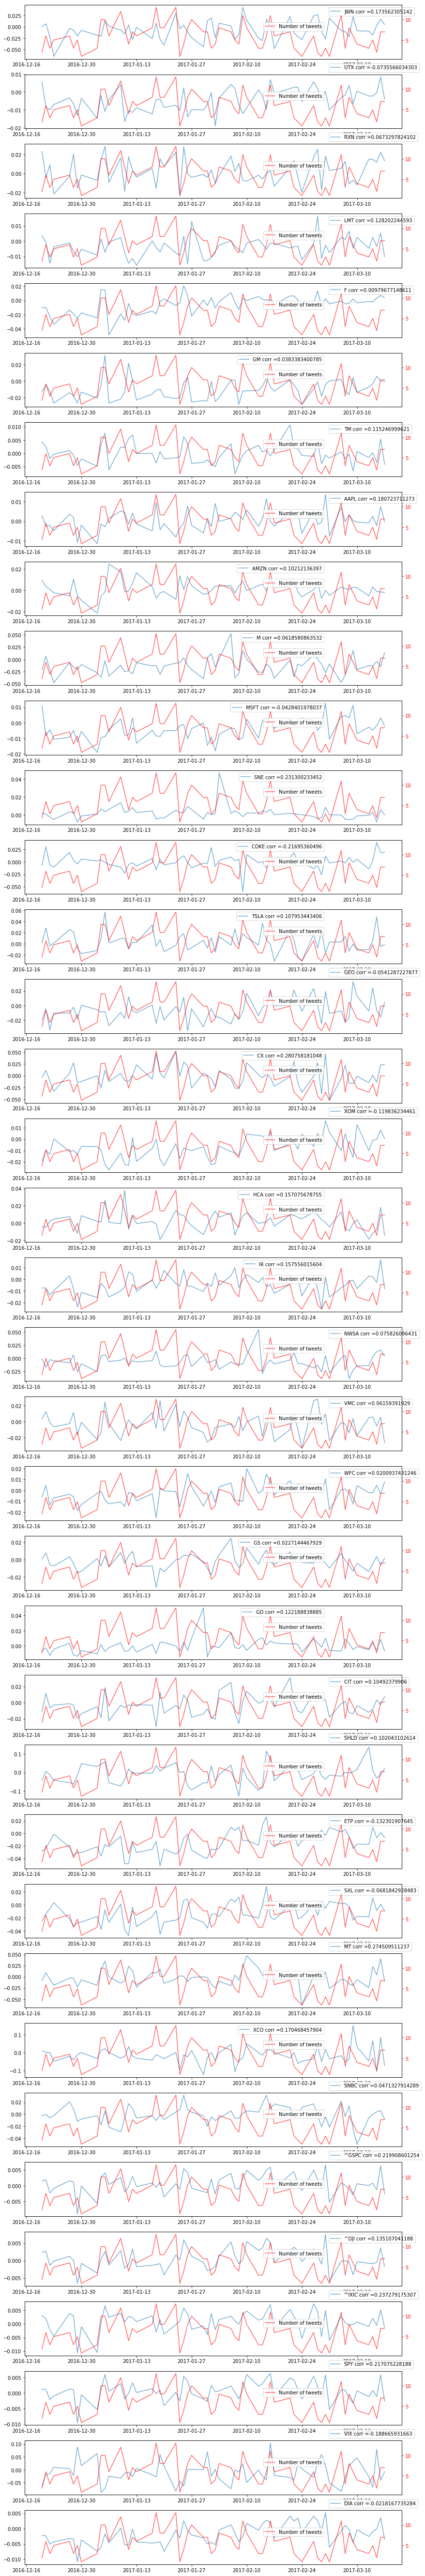

In [285]:
fig,ax = subplots(len(stocks),1,figsize=(12,len(stocks)*2))

for i in arange(len(stocks)):
    date=df['Adj Close'][stock].index.tolist()
    ccov=cov(hold[stocks[i]][:60][::-1],bins[:60][::-1])
    corr=ccov[0,1]/sqrt(ccov[0,0])/sqrt(ccov[1,1])
    ax[i].plot(date[-60:],hold[stocks[i]][:60][::-1],label=stocks[i] + ' corr ='+str(corr),alpha=.6)
    ax[i].legend(bbox_to_anchor=(.8,1))
    ax2=twinx(ax[i])
    ax2.plot(date[-60:],bins[:60][::-1],'r',label='Number of tweets',alpha=.6)
    ax2.tick_params('y', colors='r')
    ax2.legend(bbox_to_anchor=(.8,.6))
tight_layout()
savefig('Number_tweets_stocks.pdf')

In [114]:
keys=df['Adj Close'].keys()
for j in arange(len(keys)-1):
    print(cov(df['Adj Close'][keys[j]],df['Adj Close'][keys[j+1]]))

[[  1484.35020737   7292.23990791]
 [  7292.23990791  45228.50003433]]
[[ 45228.50003433             nan]
 [            nan             nan]]
[[           nan            nan]
 [           nan  1701.16210889]]
[[ 1701.16210889  -103.07915845]
 [ -103.07915845    44.54500612]]
[[   44.54500612   -75.74703473]
 [  -75.74703473  1327.20124983]]
[[ 1327.20124983   280.46087003]
 [  280.46087003    88.66709967]]
[[ 88.66709967  26.34582145]
 [ 26.34582145  12.41980146]]
[[   12.41980146    83.34107772]
 [   83.34107772  1338.37863083]]
[[ 1338.37863083   301.62598011]
 [  301.62598011    87.55201739]]
[[ 87.55201739          nan]
 [         nan          nan]]
[[           nan            nan]
 [           nan  1348.35677411]]
[[ 1348.35677411            nan]
 [           nan            nan]]
[[          nan           nan]
 [          nan  272.67930662]]
[[ 272.67930662  202.59926587]
 [ 202.59926587  221.43732962]]
[[  221.43732962   658.50175683]
 [  658.50175683  3912.91029636]]
[[ 3912.910

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [193]:
df['Adj Close'][keys[j+1]]

Date
2005-01-03    0
2005-01-04    0
2005-01-05    0
2005-01-06    0
2005-01-07    0
2005-01-10    0
2005-01-11    0
2005-01-12    0
2005-01-13    0
2005-01-14    0
2005-01-18    0
2005-01-19    0
2005-01-20    0
2005-01-21    0
2005-01-24    0
2005-01-25    0
2005-01-26    0
2005-01-27    0
2005-01-28    0
2005-01-31    0
2005-02-01    0
2005-02-02    0
2005-02-03    0
2005-02-04    0
2005-02-07    0
2005-02-08    0
2005-02-09    0
2005-02-10    0
2005-02-11    0
2005-02-14    0
             ..
2017-02-02    0
2017-02-03    0
2017-02-06    0
2017-02-07    0
2017-02-08    0
2017-02-09    0
2017-02-10    0
2017-02-13    0
2017-02-14    0
2017-02-15    0
2017-02-16    0
2017-02-17    0
2017-02-21    0
2017-02-22    0
2017-02-23    0
2017-02-24    0
2017-02-27    0
2017-02-28    0
2017-03-01    0
2017-03-02    0
2017-03-03    0
2017-03-06    0
2017-03-07    0
2017-03-08    0
2017-03-09    0
2017-03-10    0
2017-03-13    0
2017-03-14    0
2017-03-15    0
2017-03-16    0
Name: tweet_count, 

In [174]:
df['Adj Close'][keys[j]]['2016-11-8':'2016-11-19']

Date
2016-11-08    5193.490234
2016-11-09    5251.069824
2016-11-10    5208.799805
2016-11-11    5237.109863
2016-11-14    5218.399902
2016-11-15    5275.620117
2016-11-16    5294.580078
2016-11-17    5333.970215
2016-11-18    5321.509766
Name: ^IXIC, dtype: float64